# ***Integrated Retail Analytics for Store Optimization***

### ***Import required libraries***

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### ***Load & Explore Data***

In [57]:
# Load Datasets

sales_df = pd.read_csv(r'C:\Users\spand\Projects\LABMENTIX_PROJECTS\Retail_Analytics_Store_Optimization\Data\Raw\sales_dataset.csv')
store_df = pd.read_csv(r'C:\Users\spand\Projects\LABMENTIX_PROJECTS\Retail_Analytics_Store_Optimization\Data\Raw\stores_dataset.csv')
features_df = pd.read_csv(r'C:\Users\spand\Projects\LABMENTIX_PROJECTS\Retail_Analytics_Store_Optimization\Data\Raw\Features_dataset.csv')

#### **Sales data**

In [58]:
# Dataset info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [59]:
# Count of Rows & Columns
print(f"No of rows in sales dataset: {sales_df.shape[0]}")
print(f"No of columns in sales dataset: {sales_df.shape[1]}")

No of rows in sales dataset: 421570
No of columns in sales dataset: 5


In [60]:
# View the dataset
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [61]:
sales_df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False
421569,45,98,26/10/2012,1076.80,False


In [62]:
# Missing values
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [63]:
# Duplicates
sales_df.duplicated().sum()

np.int64(0)

In [64]:
# Descriptive statistics
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


In [65]:
sales_df.describe(include=['object', 'bool']).T

,count,unique,top,freq
Date,421570,143,23/12/2011,3027
IsHoliday,421570,2,False,391909


In [66]:
# Unique values
sales_df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

#### ***Basic Understanding of sales dataset***
- The dataset consists of 421570 rows and 5 columns.
- Some columns in the datset do need conversion of data type.
- It is fairly clean dataset with no missing or duplicate values.

#### ***Feature Description***
- Store -> Unique Store Id
- Dept -> Unique Department Id
- Date -> Timestamp of the record
- Weekly_Sales -> Weekly sales amount
- IsHoliday -> Binary flag indicating holiday weeks

#### **Stores data**

In [67]:
# Dataset info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [68]:
# Count of Rows & Columns
print(f"No of rows in store dataset: {store_df.shape[0]}")
print(f"No of columns in store dataset: {store_df.shape[1]}")

No of rows in store dataset: 45
No of columns in store dataset: 3


In [69]:
# View the dataset
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [70]:
store_df.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [71]:
# Missing values
store_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [72]:
# Duplicates
store_df.duplicated().sum()

np.int64(0)

In [73]:
# Descriptive statistics
store_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


In [74]:
store_df.describe(include=['object', 'bool']).T

,count,unique,top,freq
Type,45,3,A,22


In [75]:
# Unique values
store_df.nunique()

Store    45
Type      3
Size     40
dtype: int64

#### ***Basic Understanding of stores dataset***
- The dataset consists of 45 rows and 3 columns.
- No data type conversions needed for this dataset.
- It is fairly clean dataset with no missing or duplicate values.

#### ***Feature Description***
- Store -> Unique Store Id
- Type -> Categorical classification of stores
- Size -> Size of the store 

#### **Features data**

In [76]:
# Dataset info
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [77]:
# Count of Rows & Columns
print(f"No of rows in features dataset: {features_df.shape[0]}")
print(f"No of columns in features dataset: {features_df.shape[1]}")

No of rows in features dataset: 8190
No of columns in features dataset: 12


In [78]:
# View the dataset
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [79]:
features_df.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [80]:
# Missing values
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

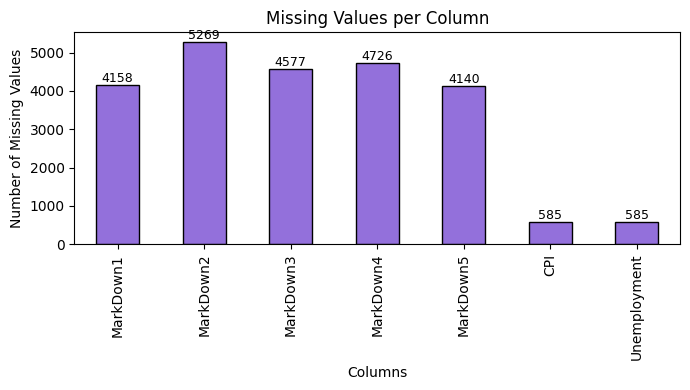

In [81]:
# Visualize missing vlues
missing = features_df.isnull().sum()[lambda x: x > 0] 

plt.figure(figsize=(7,4))
ax = missing.plot(kind='bar', color='mediumpurple', edgecolor='black')
for i, v in enumerate(missing):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [82]:
# Duplicates
features_df.duplicated().sum()

np.int64(0)

In [83]:
# Descriptive statistics
features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [84]:
features_df.describe(include=['object', 'bool']).T

,count,unique,top,freq
Date,8190,182,05/02/2010,45
IsHoliday,8190,2,False,7605


In [85]:
# Unique values
features_df.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

#### ***Basic Understanding of features dataset***
- The dataset consists of 8190 rows and 12 columns.
- Some columns in the datset do need conversion of data type.
- Although there are no duplicate values, there are missing values that need to be handled.

#### ***Feature Description***
- Store -> Unique Store Id
- Date -> Timestamp of record
- Temperature -> Average tempurature (External factor that could affect customer/supply chain behaviours)
- Fuel_Price -> Cost of fuel (Economic factor that could affect customer/supply chain behaviours)
- Markdown (1-5) -> Promotional discount/offer values
- CPI -> Consumer Price Index, a metric used for measuring inflation in India
- Unemployment -> Unemployment rate (Economic factor that could affect customer behaviour)
- IsHoliday -> Binary flag indicating holiday weeks

### ***Data Wrangling***

In [96]:
# Merge datasets
df = pd.merge(sales_df, features_df, how = 'left', on = ['Store', 'Date', 'IsHoliday']) # merging sales and features 
merged_df = pd.merge(df, store_df, how = 'left', on = 'Store') # merging df and store
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [97]:
# Convert identifiers to category
merged_df['Store'] = merged_df['Store'].astype('category')
merged_df['Dept'] = merged_df['Dept'].astype('category')
merged_df['Type'] = merged_df['Type'].astype('category')

# # Convert date to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True)

In [98]:
# Handle missing values
missing_count = df.isnull().sum()[lambda x: x > 0]
missing_percentage = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})
missing_df

,Missing Count,Missing Percentage
MarkDown1,270889,64.257181
MarkDown2,310322,73.611025
MarkDown3,284479,67.480845
MarkDown4,286603,67.984676
MarkDown5,270138,64.079038


Since these columns represent discounts/offers & more than 50% of the data contain missing values, it is best to assume that there are no discounts or offers given. Therefore, let's fill all NaN values in these columns with 0

In [99]:
# Markdown columns
md_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
merged_df[md_cols] = merged_df[md_cols].fillna(0)
merged_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64